In [1]:
import pandas as pd
import numpy as np

# Update the correct path if necessary
y_train = pd.read_csv("/kaggle/input/hijjaa/y_train.csv").values.flatten()
y_test = pd.read_csv("/kaggle/input/hijjaa/y_test.csv").values.flatten()

# Count unique classes
y_all = np.concatenate((y_train, y_test))
unique_classes = np.unique(y_all)
num_classes = len(unique_classes)

print("Number of Classes:", num_classes)
print("Unique Class Labels:", unique_classes)


Number of Classes: 29
Unique Class Labels: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]


In [3]:
import os
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# -------------------------------
# Step 1: Define Paths and Params
# -------------------------------
image_size = (32, 32)
output_base = "/kaggle/working/hijja_digits_images"

os.makedirs(output_base, exist_ok=True)

# -------------------------------
# Step 2: Load CSV Data
# -------------------------------
X_train = pd.read_csv('/kaggle/input/hijjaa/X_train.csv').values
y_train = pd.read_csv('/kaggle/input/hijjaa/y_train.csv').values.ravel()

X_test = pd.read_csv('/kaggle/input/hijjaa/X_test.csv').values
y_test = pd.read_csv('/kaggle/input/hijjaa/y_test.csv').values.ravel()

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# -------------------------------
# Step 3: Save Images to Folders
# -------------------------------
def save_images(X, y, split_name):
    for idx, (img_data, label) in enumerate(tqdm(zip(X, y), total=len(y))):
        img = img_data.reshape(32, 32).astype('uint8')
        img_resized = img  # Already 32x32

        class_dir = os.path.join(output_base, split_name, str(label))
        os.makedirs(class_dir, exist_ok=True)

        cv2.imwrite(os.path.join(class_dir, f"{idx}.png"), img_resized)

save_images(X_train, y_train, "train")
save_images(X_test, y_test, "test")

Train shape: (37933, 1024), Test shape: (9501, 1024)


100%|██████████| 9501/9501 [00:00<00:00, 10258.93it/s]


In [4]:
# -------------------------------
# Step 4: Create Validation Set
# -------------------------------
print("🔧 Splitting train into train + val...")

train_dir = os.path.join(output_base, 'train')
val_dir = os.path.join(output_base, 'val')
os.makedirs(val_dir, exist_ok=True)

for digit_class in os.listdir(train_dir):
    class_path = os.path.join(train_dir, digit_class)
    if not os.path.isdir(class_path):
        continue

    images = os.listdir(class_path)
    train_imgs, val_imgs = train_test_split(images, test_size=0.15, random_state=42)

    val_class_dir = os.path.join(val_dir, digit_class)
    os.makedirs(val_class_dir, exist_ok=True)

    for img in val_imgs:
        src = os.path.join(class_path, img)
        dst = os.path.join(val_class_dir, img)
        os.rename(src, dst)

print("✅ Train, Val, Test sets are ready.")


🔧 Splitting train into train + val...
✅ Train, Val, Test sets are ready.


📷 Visualizing from Train Set Samples...


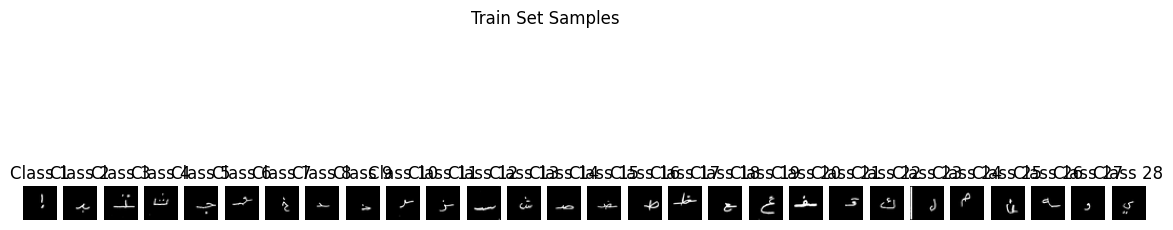

📷 Visualizing from Validation Set Samples...


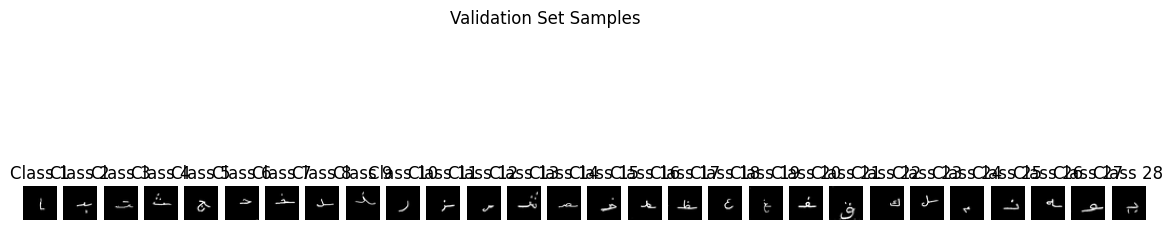

📷 Visualizing from Test Set Samples...


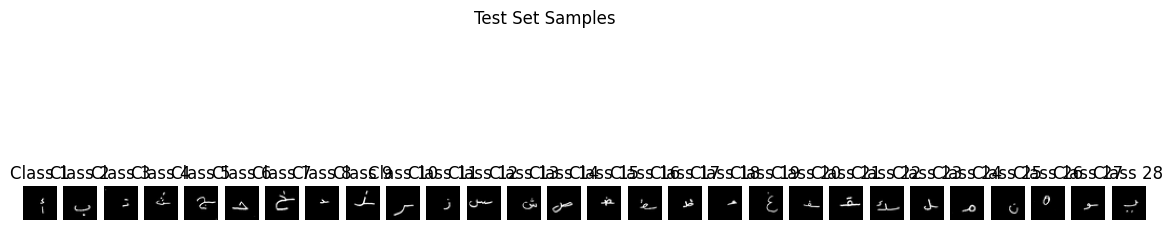

In [6]:
# -------------------------------
# Step 5: Visualize Sample Images
# -------------------------------
def visualize_samples_from_folder(folder, title, num_classes=29):
    print(f"📷 Visualizing from {title}...")
    plt.figure(figsize=(15, 4))
    for i in range(num_classes):
        class_dir = os.path.join(folder, str(i))
        if not os.path.isdir(class_dir): continue
        images = os.listdir(class_dir)
        if not images: continue
        img = cv2.imread(os.path.join(class_dir, images[0]), cv2.IMREAD_GRAYSCALE)
        plt.subplot(1, num_classes, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Class {i}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

visualize_samples_from_folder(os.path.join(output_base, 'train'), "Train Set Samples")
visualize_samples_from_folder(os.path.join(output_base, 'val'), "Validation Set Samples")
visualize_samples_from_folder(os.path.join(output_base, 'test'), "Test Set Samples")


📷 Visualizing from Train Set Samples...


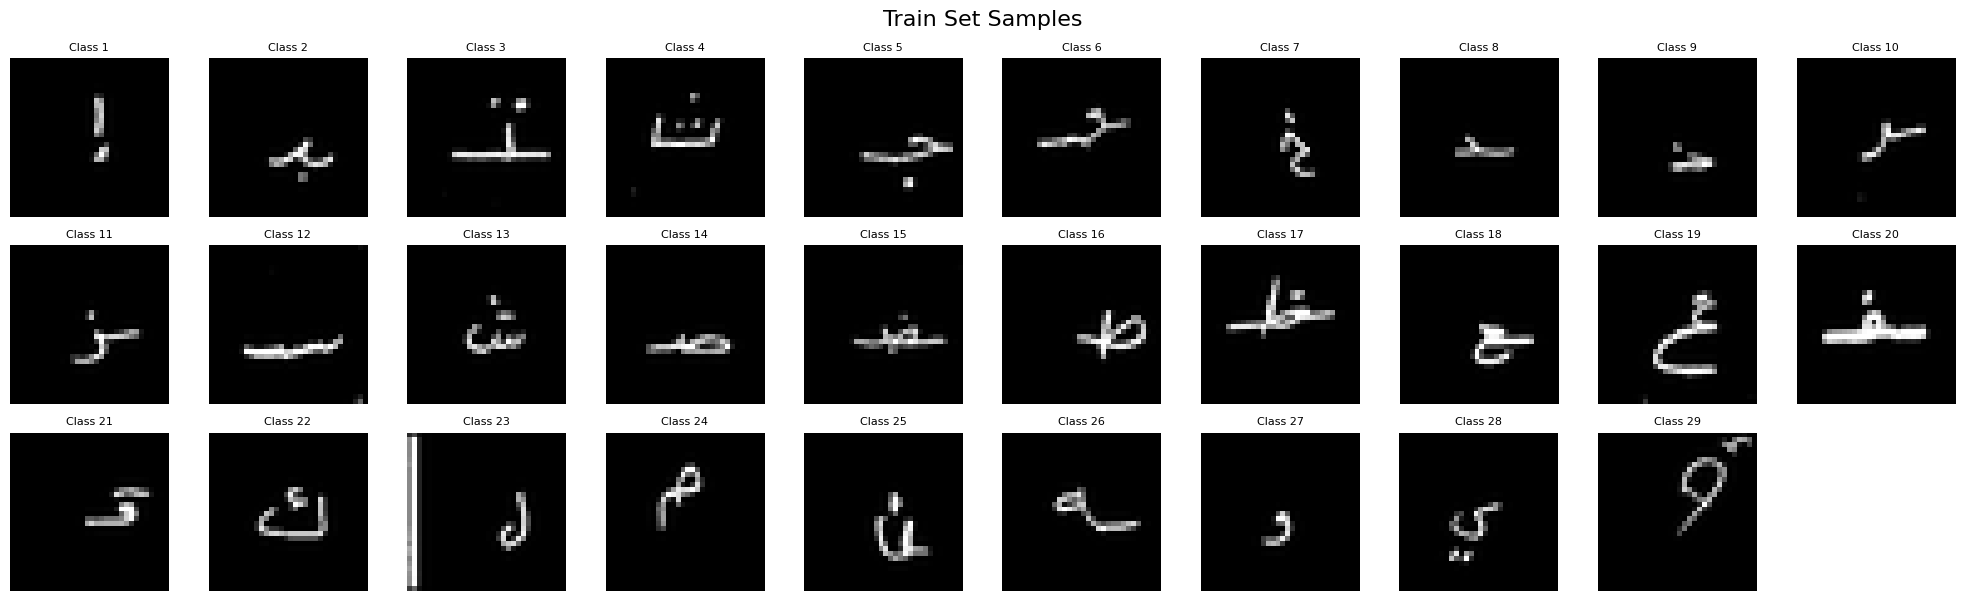

📷 Visualizing from Validation Set Samples...


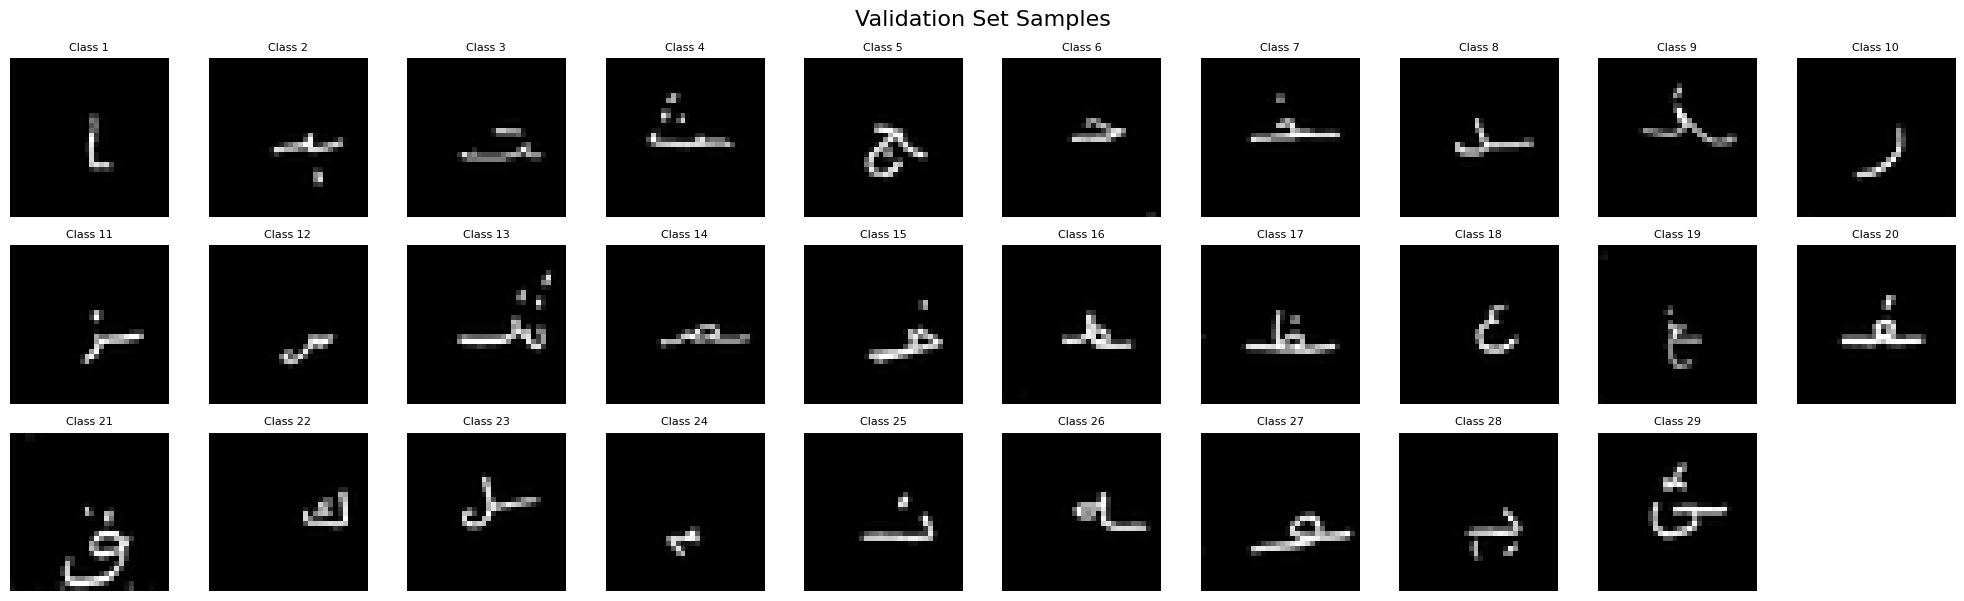

📷 Visualizing from Test Set Samples...


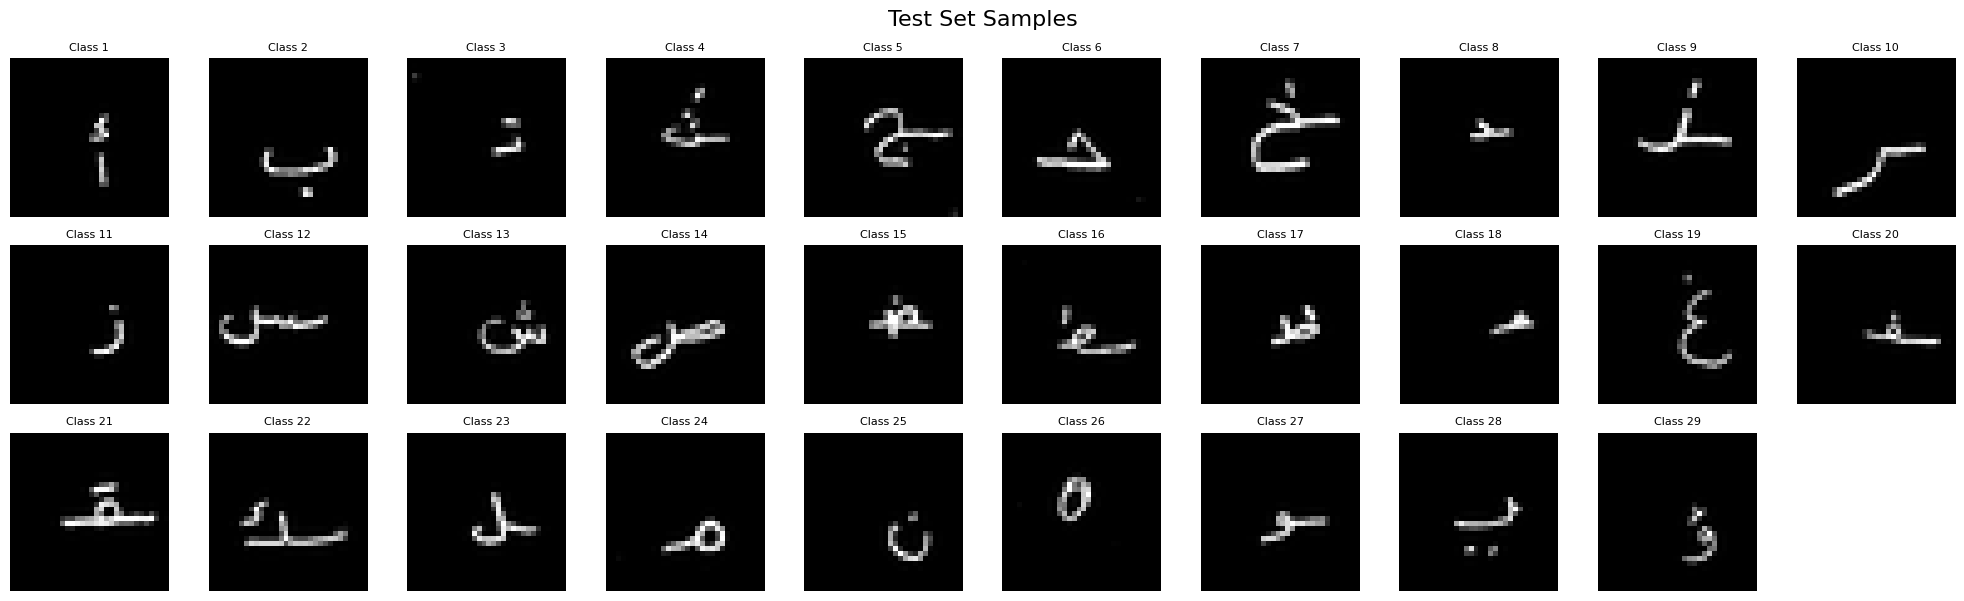

In [9]:
import matplotlib.pyplot as plt
import os
import cv2

def visualize_samples_from_folder(folder, title, num_classes=31, samples_per_class=1):
    print(f"📷 Visualizing from {title}...")
    cols = 10
    rows = (num_classes + cols - 1) // cols  # Calculate required rows

    plt.figure(figsize=(cols * 2, rows * 2))
    class_shown = 0

    for class_id in range(num_classes):
        class_dir = os.path.join(folder, str(class_id))
        if not os.path.isdir(class_dir): continue

        images = os.listdir(class_dir)
        if not images: continue

        img_path = os.path.join(class_dir, images[0])
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        plt.subplot(rows, cols, class_shown + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Class {class_id}", fontsize=8)
        plt.axis('off')
        class_shown += 1

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Visualize Train / Val / Test
visualize_samples_from_folder(os.path.join(output_base, 'train'), "Train Set Samples")
visualize_samples_from_folder(os.path.join(output_base, 'val'), "Validation Set Samples")
visualize_samples_from_folder(os.path.join(output_base, 'test'), "Test Set Samples")


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# ---------------------------------------------
# Step 2.2: Load Data with ImageDataGenerator
# ---------------------------------------------
image_size = (32, 32)
input_shape = (32, 32, 1)
batch_size = 64
epochs = 80
num_classes = 29  # Update if using fewer classes


# Paths after splitting
train_path = "/kaggle/working/hijja_digits_images/train"
val_path   = "/kaggle/working/hijja_digits_images/val"
test_path  = "/kaggle/working/hijja_digits_images/test"

# Augmented training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=5,
    zoom_range=0.05,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    fill_mode='nearest'
)

# No augmentation for validation/test
val_test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    color_mode='grayscale',
    class_mode='sparse',
    batch_size=batch_size,
    shuffle=True,
    seed=42
)

val_generator = val_test_datagen.flow_from_directory(
    val_path,
    target_size=image_size,
    color_mode='grayscale',
    class_mode='sparse',
    batch_size=batch_size,
    shuffle=False,
    seed=42
)

test_generator = val_test_datagen.flow_from_directory(
    test_path,
    target_size=image_size,
    color_mode='grayscale',
    class_mode='sparse',
    batch_size=batch_size,
    shuffle=False,
    seed=42
)


Found 32229 images belonging to 29 classes.
Found 5704 images belonging to 29 classes.
Found 9501 images belonging to 29 classes.


In [12]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, BatchNormalization,
                                     Activation, Dropout, Flatten, Dense)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

# ----------------------------
# 1. Model Architecture: ScriptNet
# ----------------------------
def build_scriptnet(input_shape=(32, 32, 1), num_classes=29):
    inputs = Input(shape=input_shape, name='input_layer')

    # Block 1
    x = Conv2D(64, (3, 3), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(64, (3, 3), padding='same')(x)  # Extra convolution layer
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.3)(x)  # Slightly increased dropout

    # Block 2
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(128, (3, 3), padding='same')(x)  # Extra convolution layer
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.3)(x)

    # Block 3
    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same')(x)  # Extra convolution layer
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.4)(x)

    # Fully connected layers
    x = Flatten()(x)
    x = Dense(1024)(x)  # Increased size
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)

    outputs = Dense(num_classes, activation='softmax', name='output_layer')(x)

    model = Model(inputs=inputs, outputs=outputs, name='ScriptNetEnhanced')
    return model

print("Model is initialized!")

Model is initialized!


In [13]:
# ----------------------------
# 3. Compile Model
# ----------------------------
model = build_scriptnet(input_shape=input_shape, num_classes=num_classes)
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

I0000 00:00:1749660527.907212      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1749660527.907925      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "ScriptNetEnhanced"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │              

 Total params: 5,376,989 (20.51 MB)

 Trainable params: 5,373,149 (20.50 MB)

 Non-trainable params: 3,840 (15.00 KB)

In [14]:
# ----------------------------
# 4. Callbacks
# ----------------------------
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, verbose=1),
    EarlyStopping(monitor='val_accuracy', patience=15, min_delta=0.001, restore_best_weights=True),
    ModelCheckpoint("scriptnet_HIJJA_best.h5", monitor="val_accuracy", save_best_only=True, verbose=1)
]

epochs=80

# ----------------------------
# 5. Train Model
# ----------------------------
steps_per_epoch = np.ceil(train_generator.samples / batch_size).astype(int)
validation_steps = np.ceil(val_generator.samples / batch_size).astype(int)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/80


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1749660577.436098     129 service.cc:148] XLA service 0x7b9a10003a20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749660577.437157     129 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1749660577.437181     129 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1749660578.146930     129 cuda_dnn.cc:529] Loaded cuDNN version 90300


  5/504 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.0469 - loss: 4.4154 

I0000 00:00:1749660585.694613     129 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.2229 - loss: 2.9254
Epoch 1: val_accuracy improved from -inf to 0.51403, saving model to scriptnet_HIJJA_best.h5
504/504 ━━━━━━━━━━━━━━━━━━━━ 43s 54ms/step - accuracy: 0.2232 - loss: 2.9239 - val_accuracy: 0.5140 - val_loss: 1.5040 - learning_rate: 0.0010
Epoch 2/80
503/504 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6575 - loss: 1.0684
Epoch 2: val_accuracy did not improve from 0.51403
504/504 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6577 - loss: 1.0679 - val_accuracy: 0.2814 - val_loss: 3.6495 - learning_rate: 0.0010
Epoch 3/80
504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7651 - loss: 0.7354
Epoch 3: val_accuracy did not improve from 0.51403
504/504 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.7652 - loss: 0.7353 - val_accuracy: 0.4783 - val_loss: 2.0566 - learning_rate: 0.0010
Epoch 4/80
504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8064 - loss: 0.6170
Epoch 4: val_accuracy did not improve f

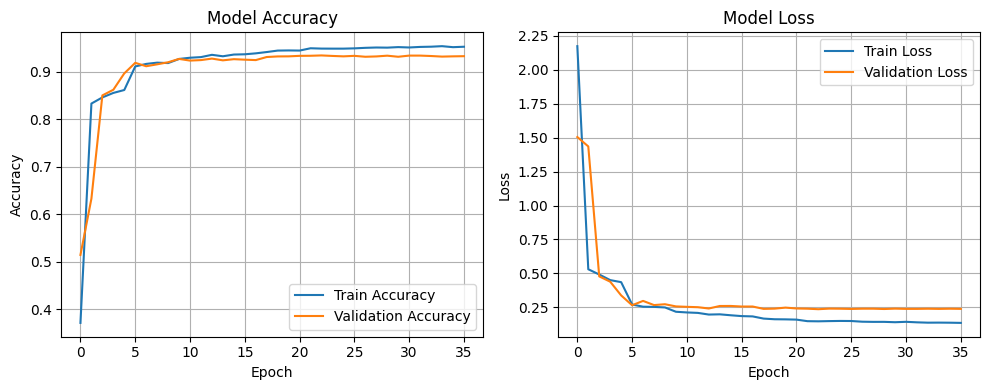

In [26]:
import matplotlib.pyplot as plt

# Extract history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Filter indices where val_accuracy doesn't randomly drop
filtered_indices = [0]  # Always keep the first point
ind = 0;
for i in range(1, len(val_acc)):
    if val_acc[i] >= val_acc[filtered_indices[ind]] or abs(val_acc[filtered_indices[ind]] - val_acc[i]) < 0.01:  # adjust threshold
        filtered_indices.append(i)
        ind = ind + 1

# Filtered values
filtered_train_acc = [train_acc[i] for i in filtered_indices]
filtered_val_acc = [val_acc[i] for i in filtered_indices]
filtered_train_loss = [train_loss[i] for i in filtered_indices]
filtered_val_loss = [val_loss[i] for i in filtered_indices]
filtered_epochs = list(range(len(filtered_indices)))

# Plot Accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(filtered_epochs, filtered_train_acc, label='Train Accuracy')
plt.plot(filtered_epochs, filtered_val_acc, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(filtered_epochs, filtered_train_loss, label='Train Loss')
plt.plot(filtered_epochs, filtered_val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


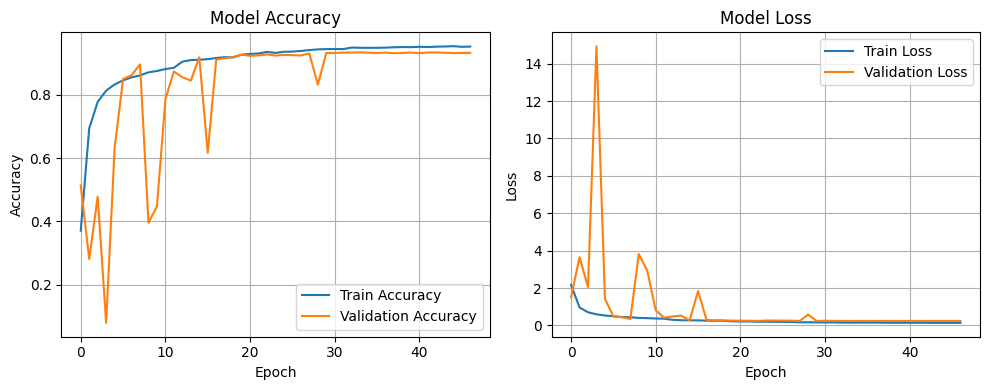

In [17]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

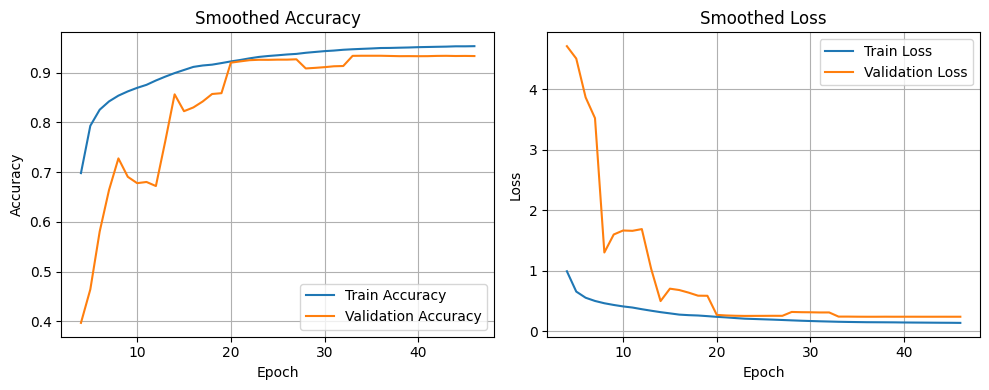

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def moving_average(data, window_size=3):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Extract history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Apply moving average smoothing
window = 5  # You can tune this
smooth_train_acc = moving_average(train_acc, window)
smooth_val_acc = moving_average(val_acc, window)
smooth_train_loss = moving_average(train_loss, window)
smooth_val_loss = moving_average(val_loss, window)
smooth_epochs = list(range(window - 1, len(train_acc)))  # align with smoothed data

# Plot Accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(smooth_epochs, smooth_train_acc, label='Train Accuracy')
plt.plot(smooth_epochs, smooth_val_acc, label='Validation Accuracy')
plt.title('Smoothed Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(smooth_epochs, smooth_train_loss, label='Train Loss')
plt.plot(smooth_epochs, smooth_val_loss, label='Validation Loss')
plt.title('Smoothed Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


  9/149 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


149/149 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step


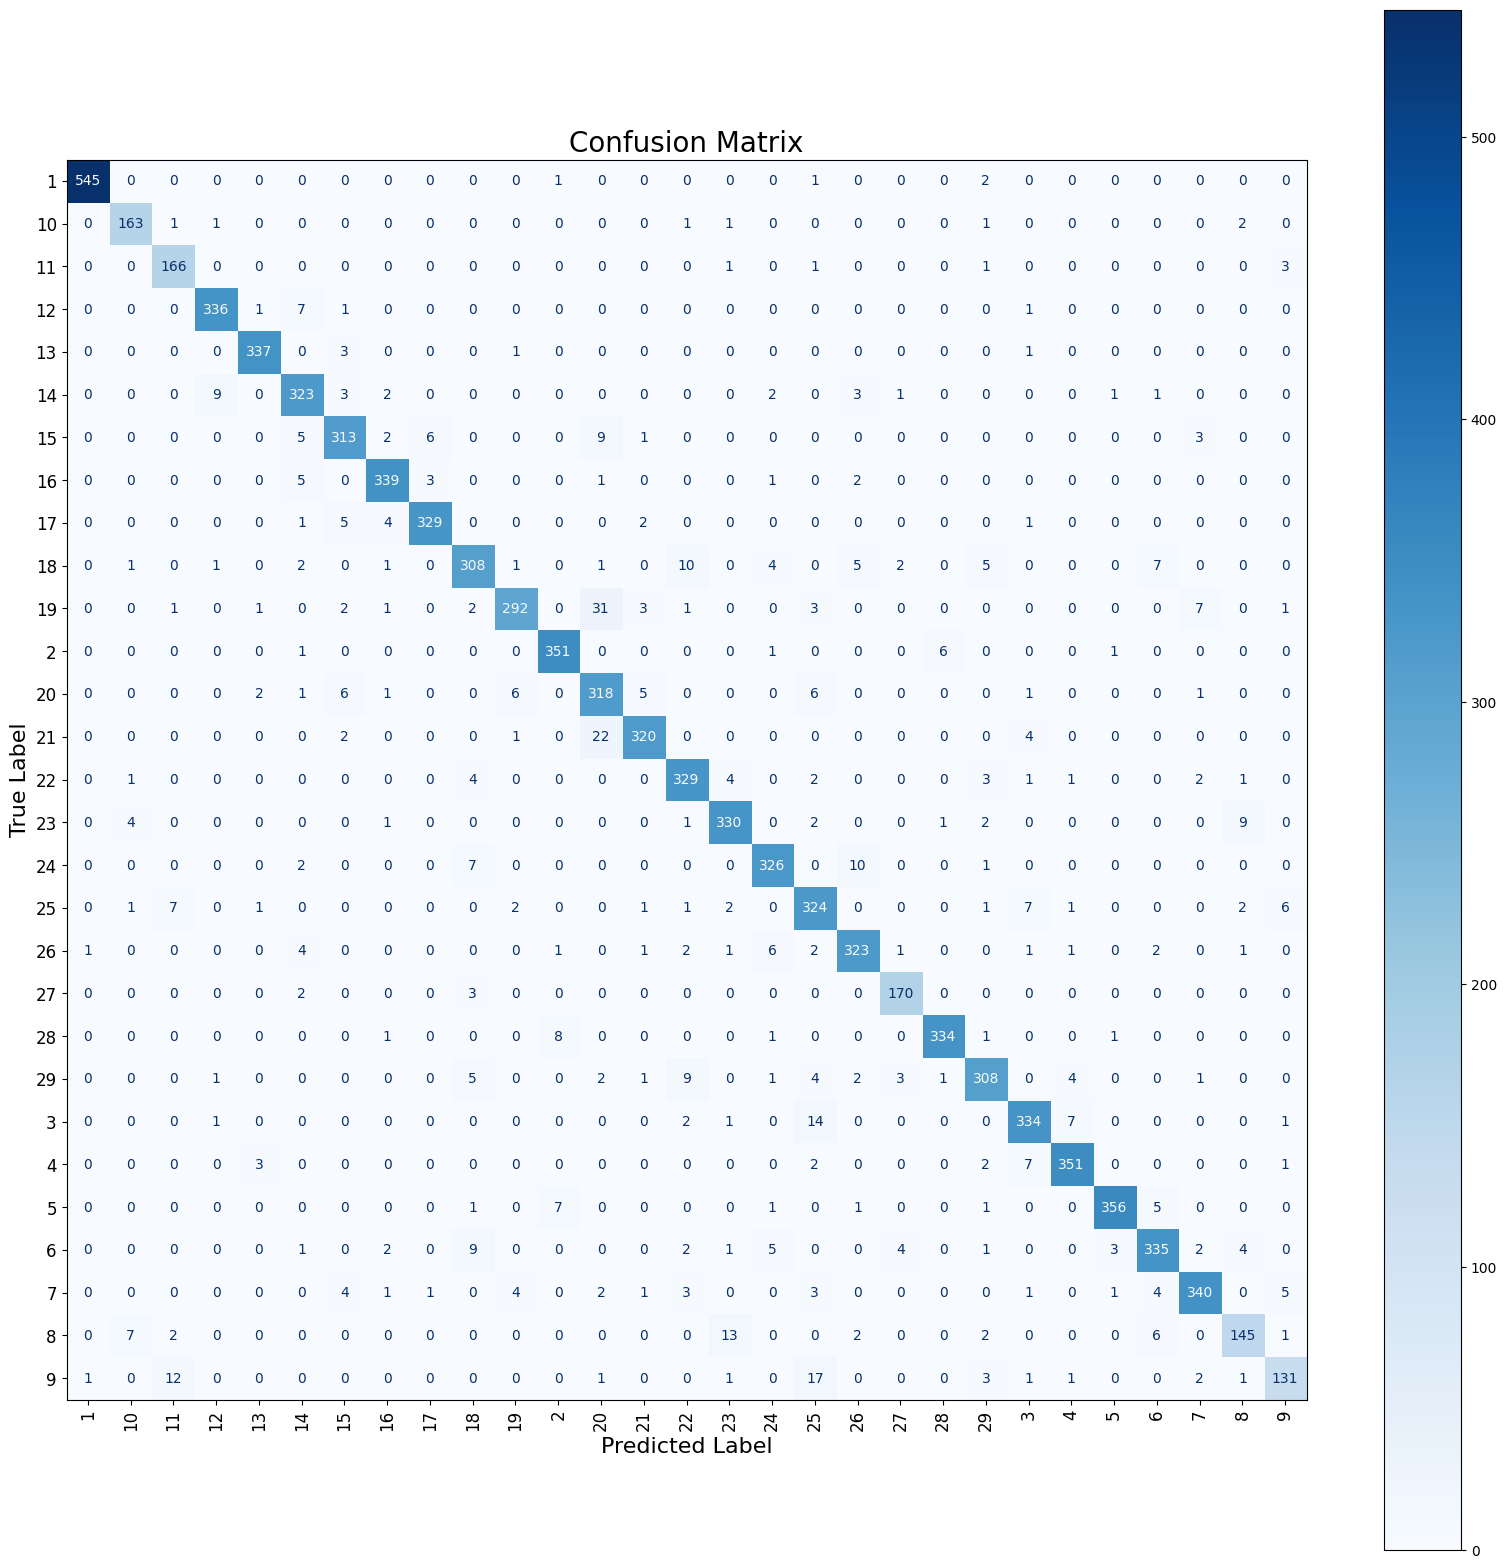

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict labels
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
labels = list(test_generator.class_indices.keys())

# Create large figure
fig, ax = plt.subplots(figsize=(20, 20))  # Adjust size as needed

# Display Confusion Matrix with custom axis
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', ax=ax, xticks_rotation=90)

# Improve font sizes for visibility
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Confusion Matrix", fontsize=20)
plt.xlabel("Predicted Label", fontsize=16)
plt.ylabel("True Label", fontsize=16)
plt.grid(False)

plt.show()

In [29]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Predict and true labels (already obtained previously)
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Print classification report
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)
print("📋 Classification Report:\n")
print(report)

# Extract and print macro, weighted scores
precision_macro = precision_score(y_true, y_pred, average='macro')
recall_macro = recall_score(y_true, y_pred, average='macro')
f1_macro = f1_score(y_true, y_pred, average='macro')

precision_weighted = precision_score(y_true, y_pred, average='weighted')
recall_weighted = recall_score(y_true, y_pred, average='weighted')
f1_weighted = f1_score(y_true, y_pred, average='weighted')

print("🔢 Macro Scores")
print(f"Precision (Macro): {precision_macro:.4f}")
print(f"Recall (Macro):    {recall_macro:.4f}")
print(f"F1-score (Macro):  {f1_macro:.4f}")

print("\n🔢 Weighted Scores")
print(f"Precision (Weighted): {precision_weighted:.4f}")
print(f"Recall (Weighted):    {recall_weighted:.4f}")
print(f"F1-score (Weighted):  {f1_weighted:.4f}")

149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
📋 Classification Report:

              precision    recall  f1-score   support

           1     0.9963    0.9927    0.9945       549
          10     0.9209    0.9588    0.9395       170
          11     0.8783    0.9651    0.9197       172
          12     0.9628    0.9711    0.9669       346
          13     0.9768    0.9854    0.9811       342
          14     0.9124    0.9362    0.9242       345
          15     0.9233    0.9233    0.9233       339
          16     0.9549    0.9658    0.9603       351
          17     0.9705    0.9620    0.9662       342
          18     0.9086    0.8851    0.8967       348
          19     0.9511    0.8464    0.8957       345
           2     0.9538    0.9750    0.9643       360
          20     0.8217    0.9164    0.8665       347
          21     0.9552    0.9169    0.9357       349
          22     0.9114    0.9454    0.9281       348
          23     0.9296    0.9429    0.9362       350
          24 

149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


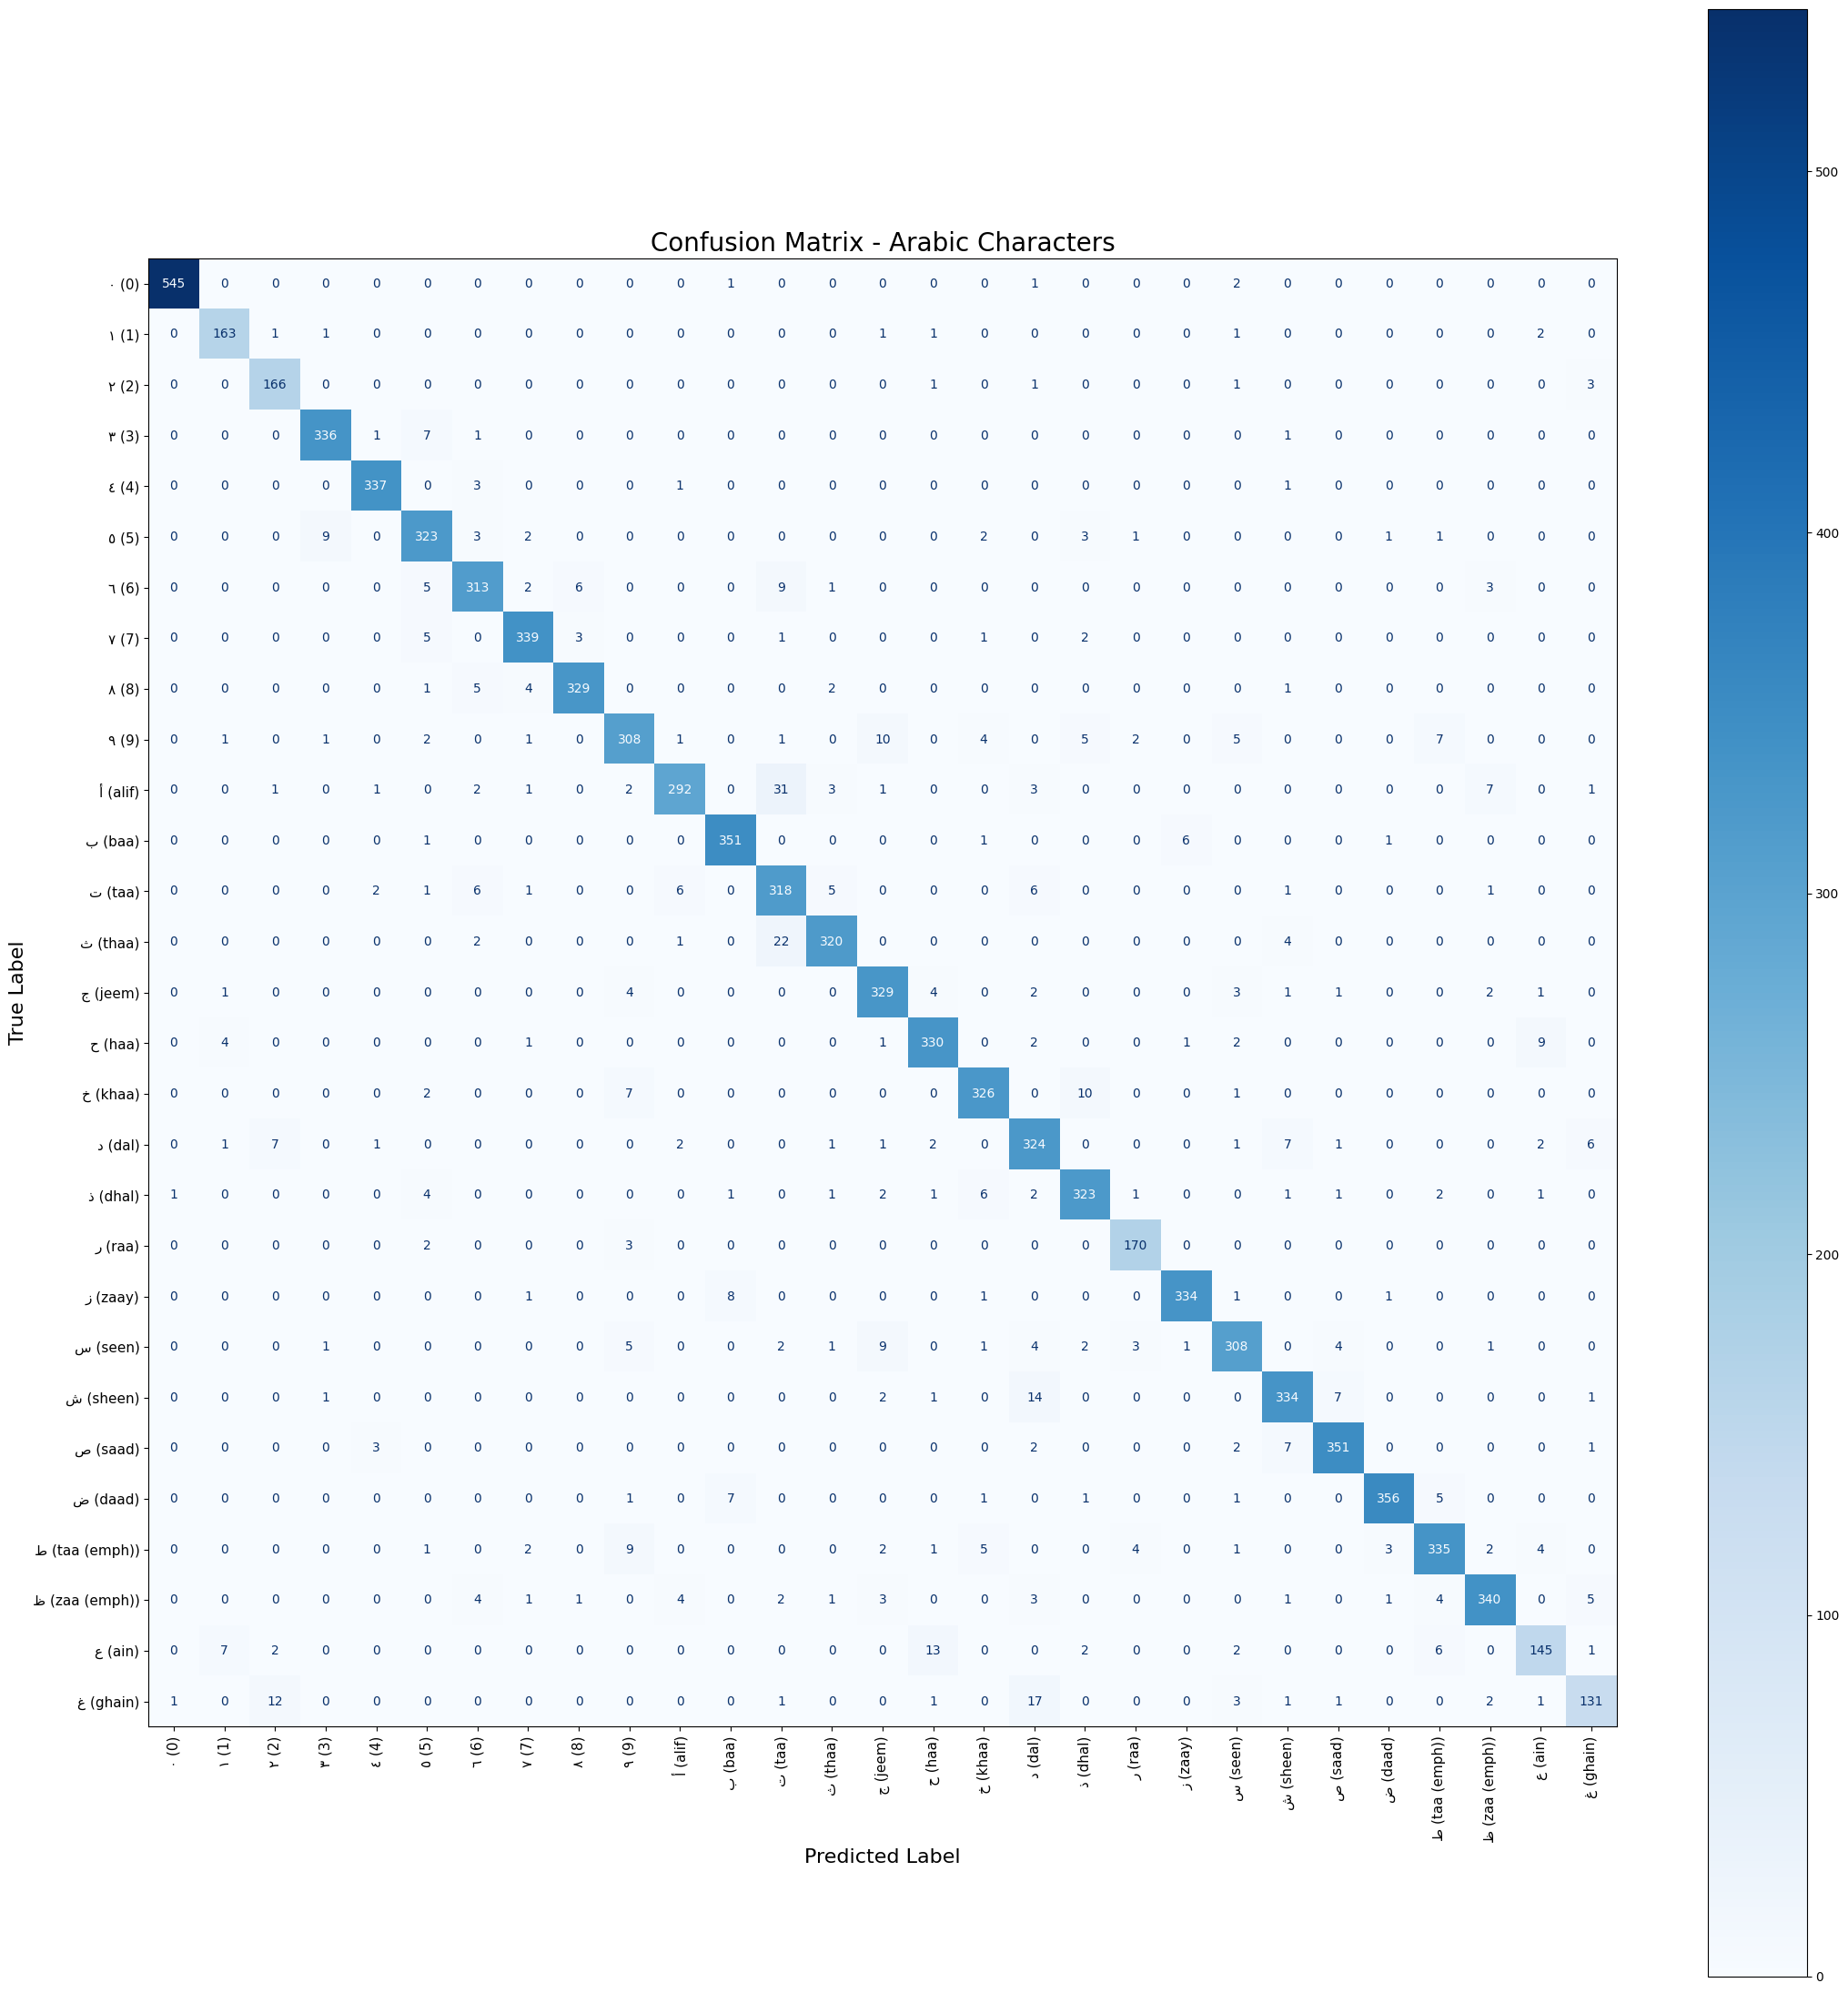

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict labels
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Define combined Arabic + English labels
arabic_labels = ['٠', '١', '٢', '٣', '٤', '٥', '٦', '٧', '٨', '٩', 
                 'أ', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 
                 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ']
english_utterances = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
                      'alif', 'baa', 'taa', 'thaa', 'jeem', 'haa', 'khaa', 'dal', 'dhal', 'raa',
                      'zaay', 'seen', 'sheen', 'saad', 'daad', 'taa (emph)', 'zaa (emph)', 'ain', 'ghain']
combined_labels = [f"{a} ({e})" for a, e in zip(arabic_labels, english_utterances)]

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(22, 22))  # Adjust size as needed
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=combined_labels)
disp.plot(cmap='Blues', ax=ax, xticks_rotation=90)

# Improve font sizes
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title("Confusion Matrix - Arabic Characters", fontsize=20)
plt.xlabel("Predicted Label", fontsize=16)
plt.ylabel("True Label", fontsize=16)
plt.grid(False)

plt.tight_layout()
plt.show()


In [31]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import numpy as np

# Predict and true labels
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes

# Arabic + English label list
arabic_labels = ['٠', '١', '٢', '٣', '٤', '٥', '٦', '٧', '٨', '٩', 
                 'أ', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 
                 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ']
english_utterances = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
                      'alif', 'baa', 'taa', 'thaa', 'jeem', 'haa', 'khaa', 'dal', 'dhal', 'raa',
                      'zaay', 'seen', 'sheen', 'saad', 'daad', 'taa (emph)', 'zaa (emph)', 'ain', 'ghain']
combined_labels = [f"{a} ({e})" for a, e in zip(arabic_labels, english_utterances)]

# Print classification report
print("📋 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=combined_labels, digits=4))

# Extract and print macro and weighted metrics
precision_macro = precision_score(y_true, y_pred, average='macro')
recall_macro = recall_score(y_true, y_pred, average='macro')
f1_macro = f1_score(y_true, y_pred, average='macro')

precision_weighted = precision_score(y_true, y_pred, average='weighted')
recall_weighted = recall_score(y_true, y_pred, average='weighted')
f1_weighted = f1_score(y_true, y_pred, average='weighted')

# Display scores
print("🔢 Macro Scores")
print(f"Precision (Macro): {precision_macro:.4f}")
print(f"Recall (Macro):    {recall_macro:.4f}")
print(f"F1-score (Macro):  {f1_macro:.4f}")

print("\n🔢 Weighted Scores")
print(f"Precision (Weighted): {precision_weighted:.4f}")
print(f"Recall (Weighted):    {recall_weighted:.4f}")
print(f"F1-score (Weighted):  {f1_weighted:.4f}")


149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
📋 Classification Report:

                precision    recall  f1-score   support

         ٠ (0)     0.9963    0.9927    0.9945       549
         ١ (1)     0.9209    0.9588    0.9395       170
         ٢ (2)     0.8783    0.9651    0.9197       172
         ٣ (3)     0.9628    0.9711    0.9669       346
         ٤ (4)     0.9768    0.9854    0.9811       342
         ٥ (5)     0.9124    0.9362    0.9242       345
         ٦ (6)     0.9233    0.9233    0.9233       339
         ٧ (7)     0.9549    0.9658    0.9603       351
         ٨ (8)     0.9705    0.9620    0.9662       342
         ٩ (9)     0.9086    0.8851    0.8967       348
      أ (alif)     0.9511    0.8464    0.8957       345
       ب (baa)     0.9538    0.9750    0.9643       360
       ت (taa)     0.8217    0.9164    0.8665       347
      ث (thaa)     0.9552    0.9169    0.9357       349
      ج (jeem)     0.9114    0.9454    0.9281       348
       ح (haa)     0.9296    0.9429